In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/participantstaskb/Participant2.csv
/kaggle/input/participantstaskb/Participant17.csv
/kaggle/input/participantstaskb/Participant22.csv
/kaggle/input/participantstaskb/Participant18.csv
/kaggle/input/participantstaskb/Participant5.csv
/kaggle/input/participantstaskb/Participant3.csv
/kaggle/input/participantstaskb/Participant25.csv
/kaggle/input/participantstaskb/Participant4.csv
/kaggle/input/participantstaskb/Participant7.csv
/kaggle/input/participantstaskb/Participant15.csv
/kaggle/input/participantstaskb/Participant9.csv
/kaggle/input/participantstaskb/Participant14.csv
/kaggle/input/participantstaskb/Participant30.csv
/kaggle/input/participantstaskb/Participant20.csv
/kaggle/input/participantstaskb/Participant10.csv
/kaggle/input/participantstaskb/Participant27.csv
/kaggle/input/participantstaskb/Participant13.csv
/kaggle/input/participantstaskb/Participant1.csv
/kaggle/input/participantstaskb/Participant29.csv
/kaggle/input/participantstaskb/Participant19.csv
/kaggle

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import DistanceMetric
from sklearn.metrics import RocCurveDisplay


%matplotlib inline

In [3]:
pip install cr-features

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 278.2 kB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for cr-features: filename=cr_features-0.1.7-py3-none-any.whl size=80471 sha256=8fb6db5e593058cbfa191c0ee6b73e9aa15cdfcfd67673b0ee32f98f9247c625
  Stored in directory: /root/.cache/pip/wheels/1c/01/7c/3ec5b298ec711e408fa1829be8cbb5a1ae762add0cb4e8c8c6
  Created wheel for biosppy: filename=biosppy-0.8.0-py2.py3-none-any.whl size=100176 sha256=bd0355bf193231648e91507592da780d20611eabcafc72392b5226274e0bf115
  Stored in directory: /root/.cache/pip/wheels/32/17/9d/77adbf0db713546eaa1c7a1480b2dce91fa724a133115dc20c
Successfully built cr-features biosppy
Note: you may need to restart the kernel to use updated pac

In [4]:
from cr_features.pipeline_functions import hmm_smooth, three_step_fs

In [5]:
DF_listA= list()
DF_listB = list()

In [6]:
#Task A
for i in range (0, 30):
    DF_listA.insert(i, pd.read_csv('../input/participantstaska/Participant'+str(i+1)+'.csv') )

#Task B
for i in range (0, 30):
    DF_listB.insert(i, pd.read_csv('../input/participantstaskb/Participant'+str(i+1)+'.csv') )

In [7]:
training_subjects = np.array([1, 4, 5, 7, 9, 10, 11, 14, 2, 16, 17, 19, 21, 22, 23, 24, 26, 27, 29, 30])
validation_subjects = np.array([3, 6, 12, 20, 25])
test_subjects = np.array([15,8,13,18,28])

In [8]:
#Task A
DF_train = list()
DF_validation = list()
DF_test = list()

#Task B
DF_trainB = list()
DF_validationB = list()
DF_testB = list()
k=0

In [9]:
#Task A
k=0

for i in training_subjects:
    DF_train.insert(k, DF_listA[i-1])
    k=k+1

#Task B
k=0

for i in training_subjects:
    DF_trainB.insert(k, DF_listB[i-1])
    k=k+1

In [10]:
#Task A
k=0
for i in validation_subjects:
    DF_validation.insert(k, DF_listA[i-1])
    k=k+1

#Task B
k=0
for i in validation_subjects:
    DF_validationB.insert(k, DF_listB[i-1])
    k=k+1

In [11]:
#Task A
k=0
for i in test_subjects:
    DF_test.insert(k, DF_listA[i-1])
    k=k+1

#Task B
k=0
for i in test_subjects:
    DF_testB.insert(k, DF_listB[i-1])
    k=k+1

In [12]:
#Task A
trainData = pd.concat(DF_train, ignore_index=True)
validData = pd.concat(DF_validation, ignore_index=True)
testData = pd.concat (DF_test, ignore_index=True)

X_train = trainData.drop(['event'], axis=1)
y_train = pd.DataFrame(trainData.iloc[:,-1])

X_valid = validData.drop(['event'], axis=1)
y_valid = pd.DataFrame(validData.iloc[:,-1])

X_test = testData.drop(['event'], axis=1)
y_test = pd.DataFrame(testData.iloc[:,-1])



#Task B
trainDataB = pd.concat(DF_trainB, ignore_index=True)
validDataB = pd.concat(DF_validationB, ignore_index=True)
testDataB = pd.concat (DF_testB, ignore_index=True)

X_trainB = trainDataB.drop(['event'], axis=1)
y_trainB = pd.DataFrame(trainDataB.iloc[:,-1])

X_validB = validDataB.drop(['event'], axis=1)
y_validB = pd.DataFrame(validDataB.iloc[:,-1])

X_testB = testDataB.drop(['event'], axis=1)
y_testB = pd.DataFrame(testDataB.iloc[:,-1])

In [13]:
from sklearn.preprocessing import StandardScaler
DF_listAstd = list()

In [14]:
for i in range (0, 30):
    DF_listAstd.insert (i, DF_listA[i].drop(['event'], axis=1))

In [15]:
names= DF_listAstd[1].columns

In [16]:
scale= StandardScaler()
for i in range (0, 30):
    DF_listAstd[i]=scale.fit_transform(DF_listAstd[i])
    DF_listAstd[i]=pd.DataFrame(DF_listAstd[i], columns=names)

In [17]:
DF_train_std = list()
DF_valid_std = list()
DF_test_std = list()

In [18]:
k=0

for i in training_subjects:
    DF_train_std.insert(k, DF_listAstd[i-1])
    k=k+1

k=0
    
for i in validation_subjects:
    DF_valid_std.insert(k, DF_listAstd[i-1])
    k=k+1
k=0

for i in test_subjects:
    DF_test_std.insert(k, DF_listAstd[i-1])
    k=k+1

In [19]:
X_train_std = pd.concat(DF_train_std, ignore_index=True)
X_valid_std = pd.concat(DF_valid_std, ignore_index=True)
X_test_std = pd.concat (DF_test_std, ignore_index=True)

In [20]:
X_train=X_train_std
X_valid=X_valid_std
X_test=X_test_std


# Training the model

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
dict_os = {
  "eyebrow_raise": 48834,
  "frown": 44230,
  "neutral": 51773 ,
  "smile": 42374 ,
  "squeeze_eyes": 43423 
}

In [23]:
oversample3 = SMOTE(sampling_strategy=dict_os, k_neighbors=5, random_state=1)

In [24]:
 X_train, y_train = oversample3.fit_resample(X_train, y_train)

In [25]:
clf_rf_us = RandomForestClassifier(n_estimators=100, random_state=42)

# Feature Selection algorithm

In [26]:
features_selected = three_step_fs(X_train, y_train, X_valid, y_valid,
                                  clf_rf_us, base_cutoff=200, correlation_threshold=0.9,verbose=False)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/cr_features/pipeline_functions.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_temp, y_train)
/opt/conda/lib/python3.7/site-packages/cr_features/pipeline_functions.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_temp, y_train)
/opt/conda/lib/python3.7/site-packages/cr_features/pipeline_functions.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

In [27]:
len(features_selected)

62

In [28]:
clf_rf_us.fit(X_train[features_selected], y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(random_state=42)

In [29]:
predictions = clf_rf_us.predict(X_test[features_selected])
score_rf_us = accuracy_score(y_test, predictions)
f1_rf_us = f1_score(y_test, predictions, average='macro')

print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

Accuracy: 86.84075780849975 %
F1-Score: 0.8155756602097849


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


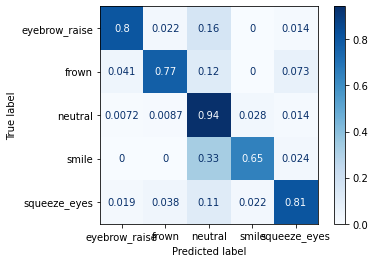

In [30]:
plot_confusion_matrix(estimator=clf_rf_us, X=X_test[features_selected], y_true=y_test,
                      normalize='true', cmap='Blues')

<br>

In [31]:
features_selected = three_step_fs(X_train, y_train, X_test, y_test,
                                  clf_rf_us, base_cutoff=200, correlation_threshold=0.9,verbose=False)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/cr_features/pipeline_functions.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_temp, y_train)
/opt/conda/lib/python3.7/site-packages/cr_features/pipeline_functions.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_temp, y_train)
/opt/conda/lib/python3.7/site-packages/cr_features/pipeline_functions.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

In [32]:
len(features_selected)

51

In [33]:
clf_rf_us.fit(X_train[features_selected], y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(random_state=42)

In [34]:
predictions = clf_rf_us.predict(X_test[features_selected])
score_rf_us = accuracy_score(y_test, predictions)
f1_rf_us = f1_score(y_test, predictions, average='macro')

print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

Accuracy: 86.23655913978494 %
F1-Score: 0.8087897719893793


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


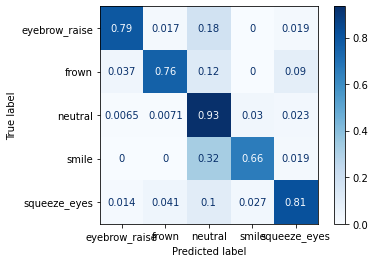

In [35]:
plot_confusion_matrix(estimator=clf_rf_us, X=X_test[features_selected], y_true=y_test,
                      normalize='true', cmap='Blues')